In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


from utils import *

In [19]:
tool_list=["arcas","hlaforest","optitype","phlat","rna2hla","seq2hla",'hlavbseq',"hlahd",'T1K','hisat']

missed_alleles = []
all_alleles = []

for t in tool_list:
    for i in range(1,7):
        gs=pd.read_csv(f"../datasets/{i}_gs.csv")
        pre=pd.read_csv(f"../results/standard/{t}_d{i}.csv")
        
        for gene in ["A", "B", "C", "DQB1", "DRB1"]:
            target = gene + ".1"
            if (target not in pre.columns):
                continue
            pre[target].fillna(pre[gene], inplace=True)
    
        ret = get_inaccurate_and_all_alleles(pre,gs)
        missed_alleles.extend(ret[0])
        all_alleles.extend(ret[1])

missed_counts = Counter(missed_alleles)
total_counts = Counter(all_alleles)


In [20]:
df = []
for k in total_counts.keys():
    try:
        df.append([k,total_counts[k],missed_counts[k], (missed_counts[k]/total_counts[k])])
    except:
        df.append([k,total_counts[k],0,0])
        
df = pd.DataFrame(df,columns=['allele','all','missed','percentage'])
df = df.sort_values(by=['percentage'],ascending=False)
df = df.drop(index=[3,170]) # drop these na values
df = df[df.percentage != 0] # drop all zeros... comment out if you want to keep completely accurate alleles in plot
df

,allele,all,missed,percentage
124,A*24:24,20,10,0.500000
23,DRB1*16:01,72,22,0.305556
129,DRB1*15:02,18,5,0.277778
16,DQB1*02:01,1624,411,0.253079
89,DRB1*08:04,126,31,0.246032
...,...,...,...,...
35,B*57:01,450,3,0.006667
11,B*13:02,310,2,0.006452
75,C*02:02,470,2,0.004255
51,C*04:01,1440,6,0.004167


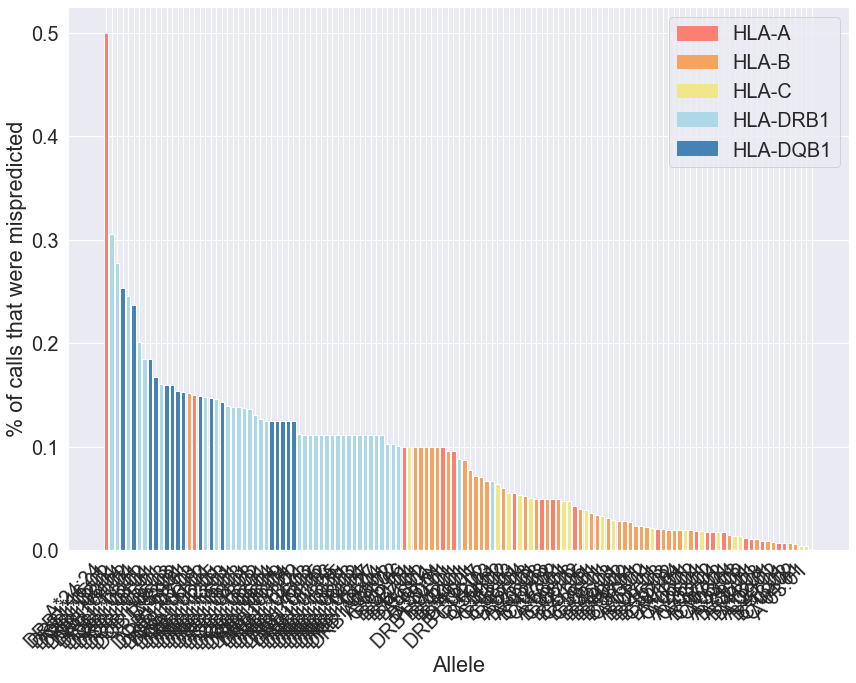

In [21]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(font_scale=1.8)

alleles = np.array(df['allele'])
accuracy = np.array(df['percentage'])
color = []

# determine what color for each bar
for a in alleles:
    if (a[0]=='A'):
        color.append('salmon')
    if (a[0]=='B'):
        color.append('sandybrown')
    if (a[0]=='C'):
        color.append('khaki')
    if (a[0:2]=='DR'):
        color.append('lightblue')
    if (a[0:2]=='DQ'):
        color.append('steelblue')

xaxis = np.arange(len(alleles))
 
plt.figure(figsize = (14,10))

plt.bar(xaxis, accuracy.astype(float),color=color)
plt.xticks(xaxis,alleles,rotation=45, ha='right')
plt.xlabel("Allele")
plt.ylabel("% of calls that were mispredicted")


# make legend manually
colors = {'HLA-A':'salmon', 'HLA-B':'sandybrown','HLA-C': 'khaki','HLA-DRB1':'lightblue','HLA-DQB1':'steelblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()

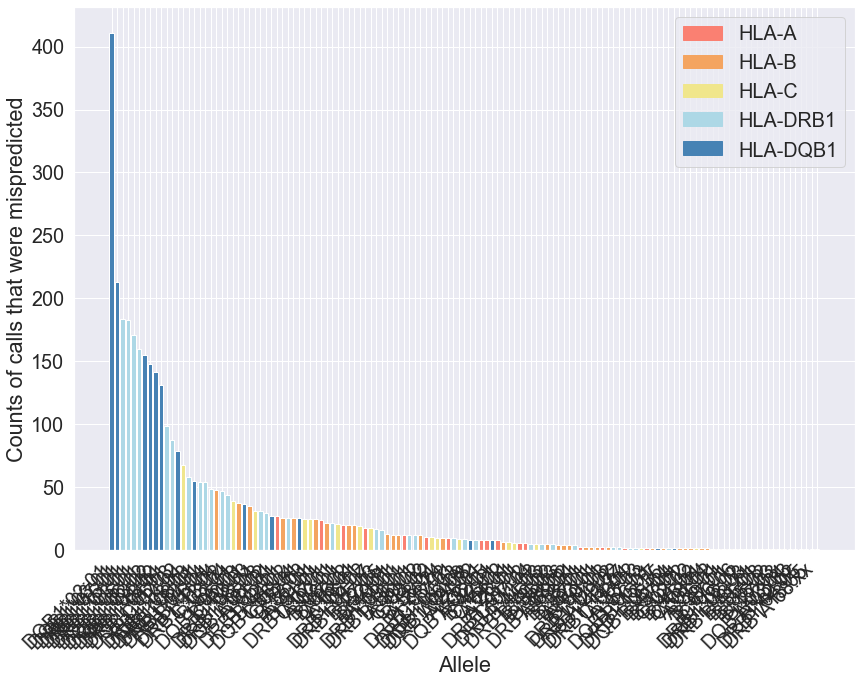

In [10]:
# plotting counts
df = df.sort_values(by=['missed'],ascending=False)

alleles = np.array(df['allele'])
count = np.array(df['missed'])
color = []

# determine what color for each bar
for a in alleles:
    if (a[0]=='A'):
        color.append('salmon')
    if (a[0]=='B'):
        color.append('sandybrown')
    if (a[0]=='C'):
        color.append('khaki')
    if (a[0:2]=='DR'):
        color.append('lightblue')
    if (a[0:2]=='DQ'):
        color.append('steelblue')

xaxis = np.arange(len(alleles))
 
plt.figure(figsize = (14,10))

plt.bar(xaxis, count.astype(float),color=color)
plt.xticks(xaxis,alleles,rotation=45, ha='right')
plt.xlabel("Allele")
plt.ylabel("Counts of calls that were mispredicted")


# make legend manually
colors = {'HLA-A':'salmon', 'HLA-B':'sandybrown','HLA-C': 'khaki','HLA-DRB1':'lightblue','HLA-DQB1':'steelblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()